# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [33]:
# import libraries here

import pandas as pd
import numpy as np

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [34]:
# your answer here
temp = pd.read_csv(r'../your-code/Temp_States.csv')
temp.head()

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444


#### Print `temp`

In [35]:
temp

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [31]:
# your answer here

temp.dtypes

City            object
State           object
Temperature    float64
dtype: object

In [36]:
temp['City'].astype('string')

0           NYC
1        Albany
2       Buffalo
3      Hartford
4    Bridgeport
5        Treton
6        Newark
Name: City, dtype: string

In [37]:
temp['State'].astype('string')

0       New York
1       New York
2       New York
3    Connecticut
4    Connecticut
5     New Jersey
6     New Jersey
Name: State, dtype: string

#### Select the rows where state is New York

In [42]:
# your answer here
temp[0:3]






,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [115]:
# your answer here

temp['Temperature'].mean(axis=0)

15.15873015873016

#### We want to know cities and states with Temperature above 15 degress Celcius

In [85]:
temp[temp['Temperature'] >= 15]

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [104]:
# your answer here

temp.City[temp['Temperature'] > 15] 

0         NYC
3    Hartford
5      Treton
6      Newark
Name: City, dtype: object

#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [113]:
temp.City[(temp['Temperature'] > 15) & (temp['Temperature'] < 20)]

0         NYC
3    Hartford
Name: City, dtype: object

#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [126]:
temp.groupby('State')['Temperature'].mean()

State
Connecticut    15.833333
New Jersey     21.111111
New York       10.740741
Name: Temperature, dtype: float64

In [127]:
temp.groupby('State')['Temperature'].std()

State
Connecticut    1.964186
New Jersey     1.571348
New York       8.133404
Name: Temperature, dtype: float64

# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [129]:
# your answer here
df = pd.read_csv(r'../your-code/Employee.csv')
df.head()

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


#### Explore the data types of the Temp dataframe. Comment your results

In [130]:
# your answer here
df.dtypes

Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object

#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

In [133]:
import matplotlib.pyplot as plt
import pylab as plt
import seaborn as sns


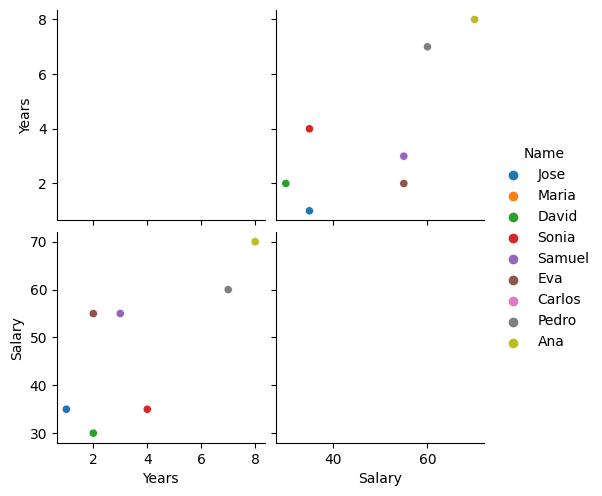

In [135]:
# is magical
sns.pairplot(df.dropna(), hue='Name');


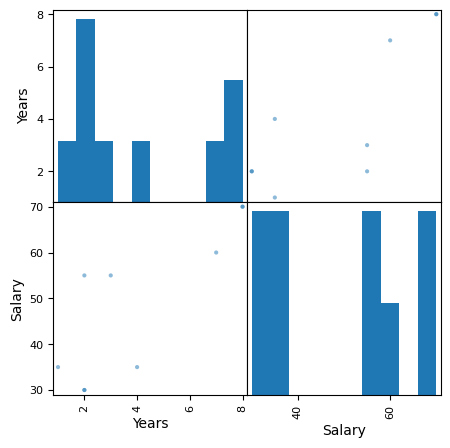

In [138]:
pd.plotting.scatter_matrix(df._get_numeric_data(), figsize=(5, 5));


#### What's the average salary in this company?

In [139]:
# your answer here
df.head()

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


In [140]:
df['Salary'].mean(axis=0)

48.888888888888886

#### What's the highest salary?

In [141]:
# your answer hereç

df['Salary'].max(axis=0)

70

#### What's the lowest salary?

In [142]:
# your answer here
df['Salary'].min(axis=0)


30

#### Who are the employees with the lowest salary?

In [178]:
# your answer here
df.groupby('Name')['Salary'].min().sort_values(ascending=True)


Name
David     30
Maria     30
Jose      35
Sonia     35
Eva       55
Samuel    55
Pedro     60
Ana       70
Carlos    70
Name: Salary, dtype: int64

#### Could you give all the information about an employee called David?

In [160]:
# your answer here
df[2:3]


,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [161]:
df[2:3:]['Salary']

2    30
Name: Salary, dtype: int64

In [158]:
# your answer here
df.Salary[temp['Salary'] = 30] 

1    Maria
2    David
Name: Name, dtype: object

#### Print all the rows where job title is associate

In [162]:
# your answer here
df.head()


,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [175]:
# your answer here- 1 method
df.loc[df['Title'] == 'associate']

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


In [21]:
# your answer here- 2nd method


#### Find the employees who's title is associate and the salary above 55?

In [ ]:
temp.City[(temp['Temperature'] > 15) & (temp['Temperature'] < 20)]

In [176]:
# your answer here
df.loc[(df['Title'] == 'associate') & (df['Salary'] > 50)]

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [179]:
df.groupby('Years')['Salary'].mean().sort_values(ascending=True)


Years
1    35.000000
4    35.000000
2    38.333333
3    55.000000
7    60.000000
8    70.000000
Name: Salary, dtype: float64

####  What is the average Salary per title?

In [180]:
# your answer here
df.groupby('Title')['Salary'].mean().sort_values(ascending=True)


Title
analyst      32.500000
associate    56.666667
VP           70.000000
Name: Salary, dtype: float64

#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

In [184]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Years,9.0,4.111111,2.803767,1.0,2.0,3.0,7.0,8.0
Salary,9.0,48.888889,16.541194,30.0,35.0,55.0,60.0,70.0


In [185]:
stats=df.describe().T

stats['IQR']=stats['75%']-stats['25%']

stats

,count,mean,std,min,25%,50%,75%,max,IQR
Years,9.0,4.111111,2.803767,1.0,2.0,3.0,7.0,8.0,5.0
Salary,9.0,48.888889,16.541194,30.0,35.0,55.0,60.0,70.0,25.0


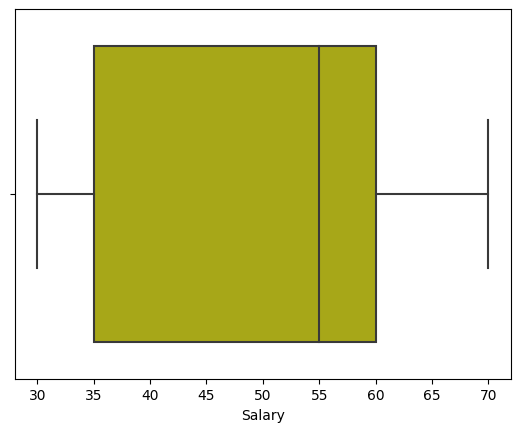

In [217]:
sns.boxplot(x=df[df.Salary >=25].Salary, color='y');


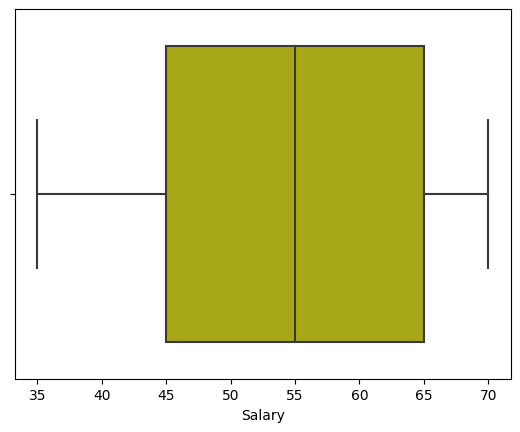

In [199]:
# print first quartile here

sns.boxplot(x=df[df.Salary >=55].Salary, color='y');



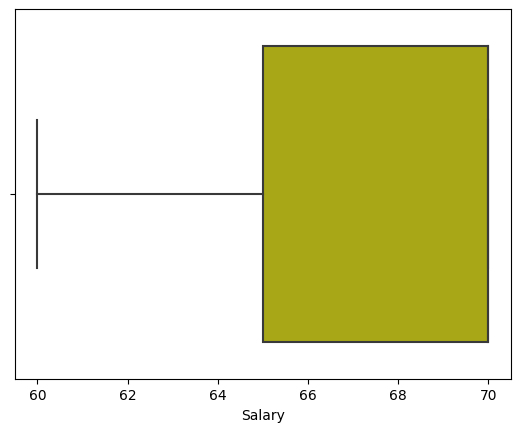

In [200]:
# print third quartile here
sns.boxplot(x=df[df.Salary >=60].Salary, color='y');


#### Is the mean salary per gender different?

In [201]:
# yes
df.groupby('Gender')['Salary'].mean().sort_values(ascending=True)


Gender
F    47.5
M    50.0
Name: Salary, dtype: float64

#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [203]:
# your answer here
stats=df.describe().T
stats

,count,mean,std,min,25%,50%,75%,max
Years,9.0,4.111111,2.803767,1.0,2.0,3.0,7.0,8.0
Salary,9.0,48.888889,16.541194,30.0,35.0,55.0,60.0,70.0


### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [32]:
# your answer here


# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [221]:
# your answer here

orders = pd.read_csv(r'../your-code/Orders.zip')
orders.head()


,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [233]:
orders.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,397924.0,278465.221859,152771.368303,0.0,148333.75,284907.50,410079.25,541908.00
InvoiceNo,397924.0,560617.126645,13106.167695,536365.0,549234.00,561893.00,572090.00,581587.00
year,397924.0,2010.934259,0.247829,2010.0,2011.00,2011.00,2011.00,2011.00
month,397924.0,7.612537,3.416527,1.0,5.00,8.00,11.00,12.00
day,397924.0,3.614555,1.928274,1.0,2.00,3.00,5.00,7.00
hour,397924.0,12.728247,2.273535,6.0,11.00,13.00,14.00,20.00
Quantity,397924.0,13.021823,180.420210,1.0,2.00,6.00,12.00,80995.00
UnitPrice,397924.0,3.116174,22.096788,0.0,1.25,1.95,3.75,8142.75
CustomerID,397924.0,15294.315171,1713.169877,12346.0,13969.00,15159.00,16795.00,18287.00
amount_spent,397924.0,22.394749,309.055588,0.0,4.68,11.80,19.80,168469.60


In [214]:
orders.shape

(397924, 14)

In [207]:
# your answer here
orders.dtypes

Unnamed: 0        int64
InvoiceNo         int64
StockCode        object
year              int64
month             int64
day               int64
hour              int64
Description      object
Quantity          int64
InvoiceDate      object
UnitPrice       float64
CustomerID        int64
Country          object
amount_spent    float64
dtype: object

####  What is the average Purchase Price?

In [208]:
# your answer here

#df.groupby('Gender')['Salary'].mean().sort_values(ascending=True)


orders['amount_spent'].mean(axis=0)


22.394748504739596

#### What were the highest and lowest purchase prices? 

In [210]:
# your answer here

orders['amount_spent'].min(axis=0) 

0.0

In [212]:
orders['amount_spent'].max()

168469.6

#### Select all the customers we have in Spain

In [226]:
orders.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Israel', 'Saudi Arabia', 'Czech Republic',
       'Canada', 'Unspecified', 'Brazil', 'USA', 'European Community',
       'Bahrain', 'Malta', 'RSA'], dtype=object)

In [292]:
orders.loc[(orders['CustomerID'] == 'Spain')]



,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent,Indexes


#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [231]:
# your answer here: 2485
orders.Country.value_counts()

United Kingdom          354345
Germany                   9042
France                    8342
EIRE                      7238
Spain                     2485
Netherlands               2363
Belgium                   2031
Switzerland               1842
Portugal                  1462
Australia                 1185
Norway                    1072
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     248
Unspecified                244
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon                     45
Lithuani

#### Select all the customers who have bought more than 50 items ?

In [282]:
orders[orders['Quantity'] > 50].groupby([orders['CustomerID']]).sum()



,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent,Indexes
CustomerID,,,,,,,,,,,
12346,61619,541431,2011,1,2,10,74215,1.04,12346,77183.60,-1
12347,148290,549222,2011,4,4,10,240,1.04,12347,249.60,-1
12348,1777269,10344381,38199,154,68,286,2096,12.51,234612,1236.64,-19
12355,362283,1104898,4022,10,2,26,156,2.50,24710,195.00,-2
12356,396824,2715155,10055,8,13,48,444,4.00,61780,313.32,-5
...,...,...,...,...,...,...,...,...,...,...,...
18246,637510,1127450,4022,15,6,24,140,5.94,36492,407.40,-2
18248,294951,562732,2011,8,2,10,72,0.29,18248,20.88,-1
18251,5431304,9065520,32176,144,32,240,7824,12.35,292016,4314.72,-16


In [232]:
# other way! the previous one is weird
orders.CustomerID[(orders['Quantity'] > 50) ]

sub_set = 

46        13748
83        15291
96        14688
102       14688
174       16029
          ...  
397720    18102
397721    16626
397729    16626
397761    15311
397882    13777
Name: CustomerID, Length: 11609, dtype: int64

#### Select orders from Spain that are above 50 items

In [313]:
##SUB_SET
sub_set= orders[(orders.Country == 'Spain')]
sub_set

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent,Indexes
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50,0
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00,0
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.00,0
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50,0
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394733,535271,581193,23291,2011,12,3,17,dolly girl childrens cup,2,2011-12-07 17:05:00,1.25,17097,Spain,2.50,-1
394734,535272,581193,85232D,2011,12,3,17,set/3 decoupage stacking tins,1,2011-12-07 17:05:00,4.95,17097,Spain,4.95,-1
394735,535273,581193,22721,2011,12,3,17,set of 3 cake tins sketchbook,2,2011-12-07 17:05:00,1.95,17097,Spain,3.90,-1
394736,535274,581193,23241,2011,12,3,17,treasure tin gymkhana design,1,2011-12-07 17:05:00,2.08,17097,Spain,2.08,-1


In [314]:
orders50 = sub_set[(sub_set.amount_spent >50)]
orders50

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent,Indexes
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5,0
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0,0
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.0,0
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5,0
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358154,485499,577606,POST,2011,11,1,9,postage,3,2011-11-21 09:11:00,28.00,12462,Spain,84.0,-1
366326,495739,578321,20728,2011,11,3,16,lunch bag cars blue,200,2011-11-23 16:59:00,1.45,12557,Spain,290.0,0
366327,495740,578321,84997B,2011,11,3,16,childrens cutlery retrospot red,72,2011-11-23 16:59:00,3.75,12557,Spain,270.0,-1
366328,495741,578321,84997D,2011,11,3,16,childrens cutlery polkadot pink,360,2011-11-23 16:59:00,3.75,12557,Spain,1350.0,-1


#### Select all free orders

In [243]:
orders.amount_spent[(orders['UnitPrice'] ==0)].head()


6914     0.0
22539    0.0
25379    0.0
29080    0.0
29082    0.0
Name: amount_spent, dtype: float64

In [239]:
# your answer here

orders.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [272]:
lunch = orders.loc[orders['Description'].str.contains("lunch bag", case=False)]
lunch

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent,Indexes
93,93,536378,20725,2010,12,3,9,lunch bag red retrospot,10,2010-12-01 09:37:00,1.65,14688,United Kingdom,16.50,0
172,174,536385,22662,2010,12,3,9,lunch bag dolly girl design,10,2010-12-01 09:56:00,1.65,17420,United Kingdom,16.50,0
354,363,536401,22662,2010,12,3,11,lunch bag dolly girl design,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65,0
359,368,536401,20725,2010,12,3,11,lunch bag red retrospot,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65,0
360,369,536401,22382,2010,12,3,11,lunch bag spaceboy design,2,2010-12-01 11:21:00,1.65,15862,United Kingdom,3.30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397465,540436,581486,23207,2011,12,5,9,lunch bag alphabet design,10,2011-12-09 09:38:00,1.65,17001,United Kingdom,16.50,0
397713,541695,581538,20727,2011,12,5,11,lunch bag black skull.,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65,0
397714,541696,581538,20725,2011,12,5,11,lunch bag red retrospot,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65,0
397877,541862,581581,23681,2011,12,5,12,lunch bag red vintage doily,10,2011-12-09 12:20:00,1.65,17581,United Kingdom,16.50,0


,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent,Indexes
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50,0
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00,0
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.00,0
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50,0
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394733,535271,581193,23291,2011,12,3,17,dolly girl childrens cup,2,2011-12-07 17:05:00,1.25,17097,Spain,2.50,-1
394734,535272,581193,85232D,2011,12,3,17,set/3 decoupage stacking tins,1,2011-12-07 17:05:00,4.95,17097,Spain,4.95,-1
394735,535273,581193,22721,2011,12,3,17,set of 3 cake tins sketchbook,2,2011-12-07 17:05:00,1.95,17097,Spain,3.90,-1
394736,535274,581193,23241,2011,12,3,17,treasure tin gymkhana design,1,2011-12-07 17:05:00,2.08,17097,Spain,2.08,-1


#### Select all orders that are made in 2011 and are 'lunch bag'  

In [275]:
# your answer here

lunch.amount_spent[(lunch['year'] == 2011)].head()


26340    16.50
26341    16.50
26512     3.30
26513     1.65
26860     1.65
Name: amount_spent, dtype: float64

#### Show the frequency distribution of the amount spent in Spain.

In [291]:
import seaborn as sns
import pylab as plt

<AxesSubplot:xlabel='amount_spent', ylabel='Count'>

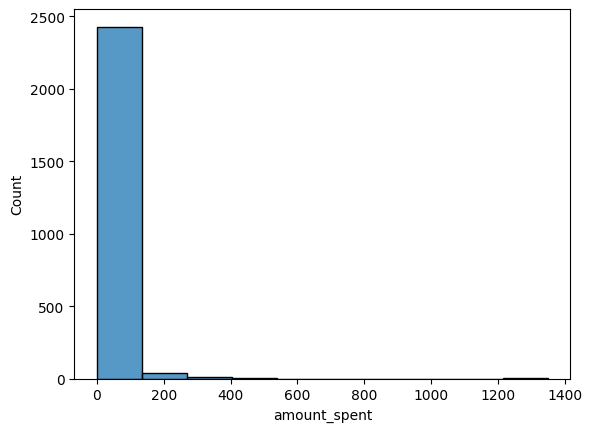

In [297]:
# your answer here


sns.histplot(x=sub_set.amount_spent, bins=10)   # bins=nº de barras


#### Select all orders made in the month of August

In [300]:
# your answer here

sub_month= orders[orders.month == 8 ]
sub_month

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent,Indexes
199475,285421,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20,-1
199476,285422,561904,85049E,2011,8,1,8,scandinavian reds ribbons,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36,-1
199477,285423,561905,21385,2011,8,1,9,ivory hanging decoration heart,24,2011-08-01 09:31:00,0.85,14947,United Kingdom,20.40,-1
199478,285424,561905,84970L,2011,8,1,9,single heart zinc t-light holder,12,2011-08-01 09:31:00,0.95,14947,United Kingdom,11.40,-1
199479,285425,561905,84970S,2011,8,1,9,hanging heart zinc t-light holder,12,2011-08-01 09:31:00,0.85,14947,United Kingdom,10.20,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226483,320688,565067,22644,2011,8,3,17,ceramic cherry cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90,-1
226484,320689,565067,22645,2011,8,3,17,ceramic heart fairy cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90,-1
226485,320690,565067,22637,2011,8,3,17,piggy bank retrospot,2,2011-08-31 17:16:00,2.55,15856,United Kingdom,5.10,-1
226486,320691,565067,22646,2011,8,3,17,ceramic strawberry cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90,-1


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [303]:
# your answer here

sub_month.groupby('amount_spent')['Country'].value_counts()

amount_spent  Country       
0.00          Netherlands       4
              EIRE              1
              United Kingdom    1
0.12          United Kingdom    1
0.19          United Kingdom    4
                               ..
1403.60       United Kingdom    1
1812.80       United Kingdom    1
2500.00       United Kingdom    1
2662.20       United Kingdom    1
4176.00       United Kingdom    1
Name: Country, Length: 2134, dtype: int64

#### What's the  average amount of money spent by country

In [307]:
# your answer here

orders.groupby('Country')['amount_spent'].mean()

Country
Australia               116.895620
Austria                  25.624824
Bahrain                  32.258824
Belgium                  20.283772
Brazil                   35.737500
Canada                   24.280662
Channel Islands          27.340160
Cyprus                   22.134169
Czech Republic           33.069600
Denmark                  49.882474
EIRE                     36.687745
European Community       21.670833
Finland                  32.913985
France                   25.056827
Germany                  25.311562
Greece                   32.831172
Iceland                  23.681319
Israel                   29.119718
Italy                    23.064960
Japan                   116.561900
Lebanon                  37.641778
Lithuania                47.458857
Malta                    24.335625
Netherlands             120.798282
Norway                   33.736418
Poland                   22.226212
Portugal                 22.872702
RSA                      17.281207
Saudi Arabia

#### What's the most expensive item?

In [315]:
# your answer here

orders.max(axis=0)

Unnamed: 0                                541908
InvoiceNo                                 581587
StockCode                                   POST
year                                        2011
month                                         12
day                                            7
hour                                          20
Description     zinc wire sweetheart letter tray
Quantity                                   80995
InvoiceDate                  2011-12-09 12:50:00
UnitPrice                                8142.75
CustomerID                                 18287
Country                              Unspecified
amount_spent                            168469.6
Indexes                                        0
dtype: object

#### What was the average amount spent per year ?

In [310]:
# your answer here

orders.groupby('year')['amount_spent'].mean()

year
2010    21.892733
2011    22.430074
Name: amount_spent, dtype: float64